# Points on a Circle

Recall the example of discovering the rules behind paintball shots with 2 circles.
Let's try to write a model that recognizes the rules.

In [16]:
#
# Import the familiar libraries
#
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [17]:
def circle(r, n):
    """a function that returns x and y coordinates of n points on a circle centered at 0, 0 with radius r"""
    
    deg = np.random.randint(360, size=n)
    rad = np.deg2rad(deg)
    
    # TODO: assign x and y
    
    return x, y

In [ ]:
colors = [(3, 'r'), (5, 'b')]
data = []
labels = []
n = 10000

for r, c in colors:
    x, y = circle(r, n)
    
    data.extend(zip(x, y))
    labels.extend([c == 'r'] * n)
    
    plt.plot(x, y, c + 'o', alpha=0.5)

plt.show()

data = np.array(data)
labels = np.array(labels)

In [ ]:
#
# Split the data and the labels using scikit built-in function train_test_split
#
from sklearn.model_selection import train_test_split

#
# TODO: split data and labels to 90% train and 10% test and assign X_train, X_test, y_train, y_test
#
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.10, random_state=42)

In [ ]:
#
# Try to classify the circles with nearest neighbor classifier
#
from sklearn.neighbors import KNeighborsClassifier

nbrs = KNeighborsClassifier(n_neighbors=1)
nbrs.fit(X_train, y_train)
y_pred = nbrs.predict(X_test)

accuracy_score(y_test, y_pred)

* What is the memory requirement for nearest neighbour classifier on the dataset above?
* How much memory would we use if we build the model for detecting the two circles manually?

## Neural Networks

In [13]:
#
# PyTorch is a popular neural networks library written by Facebook
#
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable

In [14]:
#
# Neural Network Model (1 hidden layer)
#
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__() # In Python c'tor is called explicitly
        
        #
        # Initialize a fully connected layer.
        # The output of every hidden neuron is weighted sum of all the inputs (the weights differ for every neuron)
        #
        self.fc1 = nn.Linear(input_size, hidden_size)
        
        #
        # Add the clipping so that every hidden neuron can be "responsible" on different part of the function.
        #
        self.relu = nn.ReLU()
        
        #
        # Add another fully connected layer to reduce the dimension to 2.
        #
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        #
        # The network is executed one layer after another.
        # Each layer takes as input the output of the previous layer.
        #
        
        # First we activate the linear transformation
        out = self.fc1(x)
        
        # Then the clipping
        out = self.relu(out)
        
        # And then the second transformation which reduces the dimension.
        out = self.fc2(out)
        
        return out

In [21]:
#
# Create the network object
#
net = Net(data.shape[1], 10, 2)

#
# Define loss function. Cross-entropy loss punishes more on wrong distributions than MSE.
#
criterion = nn.CrossEntropyLoss()

#
# Adam (adaptive moment optimizier) is like gradient but uses diffent learning rate
#       for each parameter and it figures out the required rate by internal heuristic)
#
optimizer = torch.optim.Adam(net.parameters())

In [148]:
#
# Convert x and y to torch tensors.
# Torch tensors are like numpy array that keep also the computation history used to calculate the gradients.
#
x = torch.from_numpy(X_train).type(torch.FloatTensor)
y = torch.from_numpy(y_train.astype(float)).type(torch.LongTensor)

#
# DataLoader is an object that allows to conviniently split the training set into batches.
#
train_loader = DataLoader(dataset=TensorDataset(x, y), batch_size=50, shuffle=True)

In [ ]:
#
# Usually a few iteration over the training set are requried for the network to converge.
# Each such iteration is called an epoch.
#
for epoch in range(5):
    #
    # In every epoch we train on all the batches in the training set
    #
    for x, y in train_loader:
        x = Variable(x)
        y = Variable(y)
        
        #
        # Reset the gradients
        #
        optimizer.zero_grad()
        
        #
        # Run the network forward
        #
        outputs = net(Variable(x))
        
        #
        # Calculate the loss
        #
        loss = criterion(outputs, Variable(y))
        
        #
        # Run the network backward
        #
        loss.backward()
        
        #
        # Update the weights by the gradients multiplied by learning rate
        #
        optimizer.step()
    
    print(epoch, loss.data[0], flush=True)

In [ ]:
#
# Test the Model
#
predicted = []

for x, y in zip(X_test, y_test):
    x = torch.from_numpy(x).type(torch.FloatTensor)
    outputs = net(Variable(x))
    outputs = outputs.detach().numpy()
    predicted += [np.argmax(outputs)]

accuracy_score(y_test, predicted)

## Linear Regression

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#
# Generate linearly related datasets x and y.
#
x = 30 * np.random.rand(1000).astype(np.float32)
y = 0.6 * x + 10
y += 10 * np.random.randn(1000).astype(np.float32)

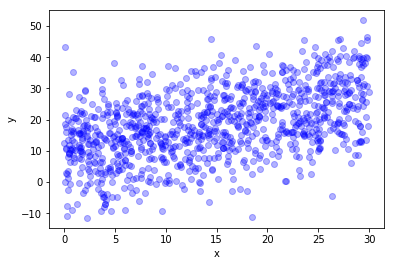

In [5]:
#
# Plot the points
#
def plot_points_and_line(x, y, w=None, b=None):
    plt.plot(x, y, 'bo', alpha=0.3)
    if w is not None:
        plt.plot(x, x * w + b, 'r')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
plot_points_and_line(x, y)

In [10]:
#
# Define the data loader to split into batches
#
x_tensor = torch.from_numpy(x).type(torch.FloatTensor)
y_tensor = torch.from_numpy(y).type(torch.FloatTensor)

batch_size = 10
train_loader = DataLoader(dataset=TensorDataset(x_tensor, y_tensor), batch_size=batch_size, shuffle=True)

In [11]:
#
# The network is just one linear function
#
net = nn.Linear(1, 1)

#
# Initialize Stochastic Gradient Descent optimizer with learning rate 0.01
# 
optimizer = torch.optim.SGD(net.parameters(), lr=0.001)

#
# Define the loss function to be mean square error
#
criterion = nn.MSELoss()

In [ ]:
epochs = 5

for i in range(epochs):
    #
    # Draw the points and the line
    #
    w = net.weight.detach().numpy()[0][0]
    b = net.bias.detach().numpy()[0]
    plot_points_and_line(x, y, w, b)

    for bx, by in train_loader:
        #
        # TODO Perform training on batch bx, by
        #

## Convolutional Neural Networks

In [155]:
def create_circle_image(r, shape=[32, 32]):
    """a function that returns a black and white image of a given shape with black background
       and 20 white points on a circle with radius r centered at the middle of the image"""

    im = np.zeros(shape)
    x, y = circle(r, 20)
    
    #
    # TODO: put the black points in an image
    #
    
    return im

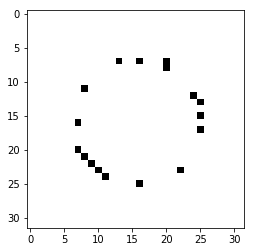

In [157]:
#
# Draw the image
#
im = create_circle_image(10)
plt.imshow(im, cmap='binary')
plt.show()

In [158]:
n = 1000
radius = [((i % 2) + 1) * 5 for i in range(n)]
labels = [(i % 2) for i in range(n)]

#
# TODO: Generate array of n images such that circle radius of images[i] is radius[i] (for 0<i<n)
#
images = ...

In [159]:
#
# Split the images and the labels into train and test
#
X_train, X_test, y_train, y_test = train_test_split(
    np.array(images), np.array(labels), test_size=0.10, random_state=42)

In [161]:
#
# Convert x and y to torch tensors.
#
x = torch.from_numpy(X_train).type(torch.FloatTensor).view(len(y_train), 1, 32, 32)
y = torch.from_numpy(y_train.astype(float)).type(torch.LongTensor)

#
# Create a DataLoader
#
train_loader = DataLoader(dataset=TensorDataset(x, y), batch_size=50, shuffle=True)

In [22]:
#
# Convolutional Neural Network Model
#
class Net(nn.Module):
    def __init__(self, filters=(10, 20), kernel=5, pool=2, linear=(500, 120)):
        super().__init__()
        
        #
        # Multiple layers can be automatically executed one after another using nn.Sequential object
        #
        self.conv1 = nn.Sequential(
            #
            # First run the convolution...
            #
            nn.Conv2d(1, filters[0], kernel_size=kernel),
            #
            # ...then reduce the dimension
            #
            nn.MaxPool2d(pool),
            #
            # ...then clip the results
            #
            nn.ReLU())
        
        self.conv2 = nn.Sequential(
            #
            # Multiple layers of convolution can approximate more sophisticated function,
            # however they can cause overfitting
            #
            nn.Conv2d(filters[0], filters[1], kernel_size=kernel),
            
            #
            # Dropout layer adds noise to reduce the overfitting
            #
            nn.Dropout2d(),
            
            # Again, reduce the dimension and clip
            nn.MaxPool2d(pool),
            nn.ReLU())
        
        self.linear1 = nn.Sequential(
            #
            # Reduce the dimension gradually with two linear layers.
            #
            nn.Linear(linear[0], linear[1]),
            
            # Put more noise to prevent overfitting and add the non-linearity
            nn.Dropout(),
            nn.ReLU())
        
        self.linear2 = nn.Sequential(
            #
            # Finally, reduce the dimension to 2 classes
            #
            nn.Linear(linear[1], 2),
            nn.ReLU())
        
        # Store the size for reshaping
        self._n = linear[0]
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        
        # Reshape the tensor and make it 1 dimensional
        x = x.view(-1, self._n)
        
        x = self.linear1(x)
        return self.linear2(x)

In [ ]:
#
# Train the network
#
net = Net()
optimizer = torch.optim.Adam(net.parameters())
criterion = nn.CrossEntropyLoss()

for epoch in range(4):
    for batch_index, (inputs, labels) in enumerate(train_loader):
        inputs, labels = Variable(inputs), Variable(torch.squeeze(labels))
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(epoch, loss.data[0])

In [ ]:
#
# Test the Model
#
predicted = []

for x, y in zip(X_test, y_test):
    x = torch.from_numpy(x).view(1, 1, 32, 32).type(torch.FloatTensor)
    outputs = net(Variable(x))
    outputs = outputs.detach().numpy()
    predicted += [np.argmax(outputs)]

accuracy_score(y_test, predicted)

## MNIST

In [235]:
import torchvision

#
# Download MNIST Dataset
#

transform = torchvision.transforms.ToTensor()


train_dataset = torchvision.datasets.MNIST('tmp', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST('tmp', train=False, download=True, transform=transform)

Processing...
Done!


In [246]:
#
# TODO: Create Data Loader that will allow iterating on batches of size 5
#
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=5, shuffle=True)

In [247]:
#
# Display 1 batch
#
def show_batch(batch):
    im = torchvision.utils.make_grid(batch)
    plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))
    plt.show()

Labels:  tensor([ 3,  2,  1,  4,  6])
Batch shape:  torch.Size([5, 1, 28, 28])


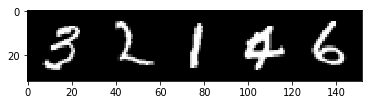

In [249]:
dataiter = iter(train_loader)
images, labels = dataiter.next()

print('Labels: ', labels)
print('Batch shape: ', images.size())

show_batch(images)

In [ ]:
#
# TODO: Create a neural network that will be able to recognize the above handwritten digits.
# Train the network and test the results.
#

# Back to Spam

In [ ]:
import numpy as np
np.random.seed(0)

with open('datasets/trec07p/full/index') as f:
    files = [line.strip().split() for line in f]
    ham = ['datasets/trec07p/full/' + path for cls, path in files if cls == 'ham']
    spam = ['datasets/trec07p/full/' + path for cls, path in files if cls == 'spam'][:len(ham)]
    emails = ham + spam
    labels = np.zeros((len(emails),))
    labels[len(ham):] = 1
    permutation = np.random.permutation(labels.size)
    emails = [emails[i] for i in permutation]
    labels = labels[permutation] > 0
    
def read_file(path):
    with open(path, 'rb') as f:
        return f.read()
    
def subject(content):    
    i = content.find(b'\n\n')
    if i < 0:
        i = content.find(b'\r\n\r\n')
        if i < 0:
            return b''
    headers = content[:i]

    subj = b'\nSubject:'
    j = headers.find(subj)
    if j < 0:
        return b''

    return headers[j+len(subj):].split(b'\n', maxsplit=1)[0].strip()

train = emails[:40000]
test = emails[40000:]

y_train = labels[:40000]
y_test = labels[40000:]

train = [subject(read_file(path)) for path in train]
test = [subject(read_file(path)) for path in test]

In [ ]:
#
# Create one hot-encoding off all the subjects
#
I = np.eye(256)

def encode(subj):
    if len(subj) > 128:
        subj = subj[:128]
    elif len(subj) < 128:
        subj = subj + (128 - len(subj)) * b'_'
    return np.hstack([I[b, :] for b in subj])

onehot = np.array([encode(s) for s in subjects])

In [ ]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 256, kernel_size=(256, 7), stride=1),
            nn.ReLU()
        )

        self.maxpool1 = nn.MaxPool2d(kernel_size=(1, 3), stride=(1, 3))

        self.conv2 = nn.Sequential(
            nn.Conv2d(1, 256, kernel_size=(256, 7), stride=1),
            nn.ReLU()
        )
        self.maxpool2 = nn.MaxPool2d(kernel_size=(1, 3), stride=(1, 3))

        self.conv3 = nn.Sequential(
            nn.Conv2d(1, 256, kernel_size=(256, 3), stride=1),
            nn.ReLU()
        )

        self.conv4 = nn.Sequential(
            nn.Conv2d(1, 256, kernel_size=(256, 3), stride=1),
            nn.ReLU()
        )

        self.conv5 = nn.Sequential(
            nn.Conv2d(1, 256, kernel_size=(256, 3), stride=1),
            nn.ReLU()
        )

        self.conv6 = nn.Sequential(
            nn.Conv2d(1, 256, kernel_size=(256, 3), stride=1),
            nn.ReLU()
        )

        self.maxpool6 = nn.MaxPool2d(kernel_size=(1, 3), stride=(1, 3))

        self.fc1 = nn.Sequential(
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Dropout(p=0.5)
        )
        self.fc2 = nn.Sequential(
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Dropout(p=0.5)
        )
        self.fc3 = nn.Linear(256, 4)

    def forward(self, x):
        x = self.conv1(x)
        x = x.transpose(1, 2)       
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = x.transpose(1, 2)
        x = self.maxpool2(x)
        x = self.conv3(x)
        x = x.transpose(1, 2)
        x = self.conv4(x)
        x = x.transpose(1, 2)
        x = self.conv5(x)
        x = x.transpose(1, 2)
        x = self.conv6(x)
        x = x.transpose(1, 2)
        x = self.maxpool6(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)

        return x

In [233]:
#
# TODO: Use the network above to classify spam by subject only.
# Write the training code, the test code and print the accuracy.
#

In [ ]:
#
# Bonus TODO: Use the values coming out of maxpool6 in the network above as features of the spam classification forest.
#